# 常见概率分布

水文水资源中经常用到统计相关知识，比如工程水文学中对径流做统计时，通常会使用P-III分布等，这里就日常积累一些常见的概率分布。

## 伽马分布

认识伽马分布之前，首先了解一下Gamma函数，这部分主要参考[LDA-math - 神奇的 Gamma 函数](https://cosx.org/2013/01/lda-math-gamma-function/)。

### Gamma函数

$\Gamma (x)=\int_0^{\infty}t^{x-1}e^{-t}dt$

这么个形式奇特的函数是怎么出现的呢？

数学家常常会做一些延拓工作，比如以前的从整数到实数，从实数到复数等等。1728年，哥德巴赫在考虑数列插值的问题，
通俗的说就是把数列的通项公式定义从整数集合延拓到实数集合，例如数列1,4,9,16,⋯ 可以用通项公式$n^2$自然的表达，即便 
n为实数的时候，这个通项公式也是良好定义的。

那么对于阶乘，整数的阶乘定义很清楚，那么如何定义实数的阶乘？过程本文不清楚，但是最后结果是：

丹尼尔贝努利发现下式m足够大时可近似表达阶乘。

$\frac{1⋅2⋅3⋅⋅⋅m}{(1+n)(2+n)⋅⋅⋅(m-1+n)}(m+\frac{n}{2})^{n-1} \to n!$

欧拉发现如下式所示的无穷级数可以表达阶乘。

$\displaystyle{\lim_{m \to \infty}} \frac{1⋅2⋅3⋅⋅⋅m}{(1+n)(2+n)⋅⋅⋅(m+n)}(m+n)^{n}=n！$

欧拉试算了$(\frac 1 2 )!=\frac{\sqrt\pi}{2}$，发现竟然有圆周率$\pi$出现，因此其猜测阶乘必与和圆相关的积分有关。因此就开始把阶乘表示为积分的形式。过程本文不明，结果如开头所示。

至于为什么$\Gamma (n)=(n-1)!$而不是$\Gamma (n)=n!$，这可能与Beta函数有关，这部分在Beta函数中再提及。

以下基于python绘制了Gamma函数的图像。

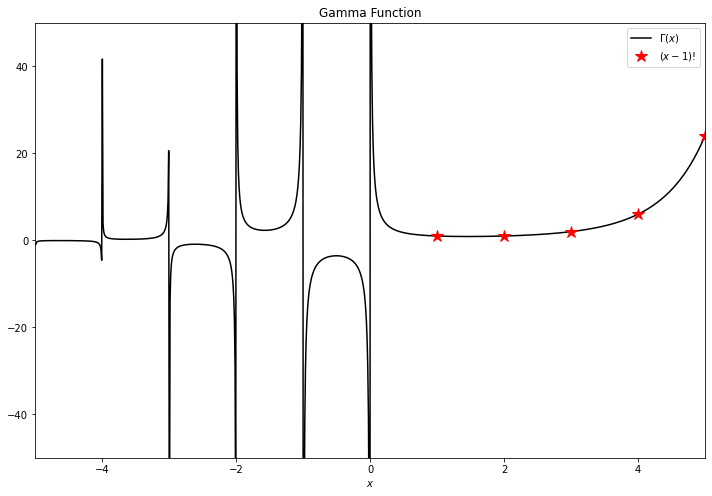

In [2]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
# The Gamma function
x = np.linspace(-5, 5, 1000)
plt.plot(x, gamma(x), ls='-', c='k', label='$\Gamma(x)$')

# (x-1)! for x = 1, 2, ..., 6
x2 = np.linspace(1,6,6)
y = np.array([1, 1, 2, 6, 24, 120])
plt.plot(x2, y, marker='*', markersize=12, markeredgecolor='r',
           markerfacecolor='r', ls='',c='r', label='$(x-1)!$')

plt.title('Gamma Function')
plt.ylim(-50,50)
plt.xlim(-5, 5)
plt.xlabel('$x$')
plt.legend()
plt.show()

### Gamma分布

Gamma 函数在概率统计中频繁现身，众多的统计分布，包括常见的统计学三大分布 (t分布，卡方分布，F分布)、Beta 分布、Dirichlet 分布的密度公式中都有 Gamma 函数的身影；
当然发生最直接联系的概率分布是直接由 Gamma 函数变换得到的 Gamma 分布。

Gamma分布是一个非常有用的连续随机变量的分布族，其在概率统计领域也是一个万人迷，众多统计分布和它有密切关系。
如果把统计分布中的共轭关系类比为人类生活中的情侣关系的话，那指数分布、Poission 分布、正态分布、对数正态分布都可以是 Gamma 分布的情人。
且指数分布和 $\chi ^2$分布都是特殊的 Gamma 分布。

另外 Gamma 分布作为先验分布是很强大的，在贝叶斯统计分析中被广泛的用作其它分布的先验。

Gamma 分布首先和 Poisson 分布、Poisson 过程发生密切的联系，因为对Poisson分布时相对熟悉的。因此先看看它们之间的关系。

直接给出结论：

- 指数分布解决的问题是“要等到一个随机事件发生，需要经历多久时间”；
- 泊松分布解决的是“在特定时间里发生n个事件的机率”。
- 伽玛分布解决的问题是“要等到n个随机事件都发生，需要经历多久时间”。

即泊松过程是一个计数过程，通常用于模拟一个（非连续）事件在连续时间中发生的次数。
泊松过程的事件间隔时间为指数分布。
Gamma分布即为多个独立且相同分布的指数分布变量的和的分布。

Gamma分布适用场景：

“排队时间”问题。排队不只是人的排队，在计算机高性能计算，比如CUDA中，任务的排队也是有的，所以这个模型适用场景还是比较多的。
虽然可能不如正态分布在自然界中那么普遍，但是在正随机变量中，Gamma分布族在连续分布中举足轻重。

再比如一个[例子](https://www.zhihu.com/question/34866983/answer/142682610)，
冗余系统（standby redundant system）假设有一个系统有个部件，但实际需要的只有一个（其余的是备用）。
当一个部件失效时，另一个自动接管。因此，只有当所有个部件都失效时，系统才会崩溃。
在一定假设下，Gamma分布可以用来描述这样一个系统的寿命。


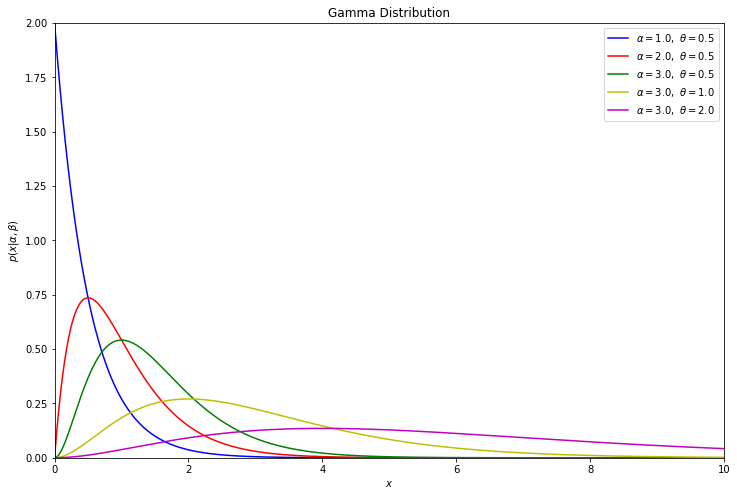

In [4]:
import numpy as np
from scipy.stats import gamma
from matplotlib import pyplot as plt

alpha_values = [1, 2, 3, 3, 3]
beta_values = [0.5, 0.5, 0.5, 1, 2]
color = ['b','r','g','y','m']
x = np.linspace(1E-6, 10, 1000)

fig, ax = plt.subplots(figsize=(12, 8))

for k, t, c in zip(alpha_values, beta_values, color):
    dist = gamma(k, 0, t)
    plt.plot(x, dist.pdf(x), c=c, label=r'$\alpha=%.1f,\ \theta=%.1f$' % (k, t))

plt.xlim(0, 10)
plt.ylim(0, 2)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title('Gamma Distribution')

plt.legend(loc=0)
plt.show()

## 卡方分布

本节了解卡方分布。

### 一些例子

为了理解卡方检验，先给出几个例子：

研究你研究了两组人，你把他们分成三个类别，单身、已婚和离婚：
三个类别的数据是不同的，但是 ……
- 这是不是随机的？
- 还是真有实质的不同？

再比如："你喜欢哪种度假方式？"
 
|-|沙滩	|邮轮|
|-|-|-|
|男|  209|	280|
|女 | 225|	248|
 
性别对度假方式的偏爱有影响吗？如果性别（男或女）真的对度假方式的偏爱有影响，它们便是相依的。
如果我们用一个算法计算出一个“p”值为一个数，假设0.132。通常会令p<0.05时代表变量是相依的。由于这里大于0.05，因此说明变量是独立的，即男人和女人对沙滩和邮轮独家的偏爱是没区别的。

再比如：你喜欢哪种动物？

 |-|猫|	狗|
 |-|-|-|
 |男	|207	|282|
 |女	|231	|242|

算法（在下面解释）的结果是：P值是 0.043。这意味着结果是显著的，变量不独立。即我们认为性别与宠物偏爱有关联。

所以卡方检验是一个敏感的测试。

### 了解p值

"p" 是变量是独立的概率。

为什么p<0.05?

因为这只是一种选择，是一种惯例。

如何计算p值？

使用卡方检验！（用上面最后一个例子说明）

- 注意卡方检验只适用于分类数据；
- 数据的值需要较大时才合适。

#### 1.声明假设

假设需要是一个可能是真的陈述，并且可以验证的。

在我们的例子里有两个假设：

- 性别对猫或狗的偏爱是独立的
- 性别对猫或狗的偏爱不是独立的

#### 2. 计算卡方
 (1)设A代表某个类别的观察频数，E代表基于H0计算出的期望频数，A与E之差称为残差。
 (2)显然，残差可以表示某一个类别观察值和理论值的偏离程度，但如果将残差简单相加以表示各类别观察频数与期望频数的差别，则有一定的不足之处。因为残差有正有负，相加后会彼此抵消，总和仍然为0，为此可以将残差平方后求和。
 (3)另一方面，残差大小是一个相对的概念，相对于期望频数为10时，期望频数为20的残差非常大，但相对于期望频数为1 000时20的残差就很小了。考虑到这一点，人们又将残差平方除以期望频数再求和，以估计观察频数与期望频数的差别。
 进行上述操作之后，就得到了常用的χ2统计量。

In [5]:
men={"cat":207,"dog":282}
women={"cat":231,"dog":242}

# 行列分别求和
men_sum=sum(men.values())
women_sum=sum(women.values())
cat_sum=men["cat"]+women["cat"]
dog_sum=men["dog"]+women["dog"]

all_sum=men_sum+women_sum

# 求每项的“期望值”，行的和乘以列的和，再除以全部和
men_cat=men_sum*cat_sum/all_sum
women_cat=women_sum*cat_sum/all_sum
men_dog=men_sum*dog_sum/all_sum
women_dog=women_sum*dog_sum/all_sum

# 从实际值减去期望值，取平方，再除以期望值
men_cat_chi2=(men["cat"]-men_cat)**2/men_cat
women_cat_chi2=(women["cat"]-women_cat)**2/women_cat
men_dog_chi2=(men["dog"]-men_dog)**2/men_dog
women_dog_chi2=(women["dog"]-women_dog)**2/women_dog

# 求和计算卡方
all_chi2=men_cat_chi2+women_cat_chi2+men_dog_chi2+women_dog_chi2

#### 3.由卡方计算p值

由卡方的值来求p值是一个复杂的算法，要根据卡方分布进行求解。

首先，要计算自由度

In [6]:
# 自由度就是(行数 − 1) 乘以 (列数 − 1)
row_num=2
column_num=2
dof=(row_num-1)*(column_num-1)

p值是怎么求的？这就需要了解卡方分布了。

### 卡方分布

这部分主要参考：<https://www.zhihu.com/question/20358827/answer/386269824>

假设实验中从总体中随机取样得到的n个**观察值**（随机将色子抛n次）被划分为k个**互斥的分类**（分类为色子点数，1-6点），
这样每个分类（每个点数）都有一个对应的实际观察次数**Xi**{ i=1,2,...,k}。
研究人员会对实验中各个观察值落入第 i个分类（色子在那个点数）的概率Pi的分布提出零假设
（认为观测值与理论值的差异是由于随机误差所致，就是其概率是等于理论上的概率，相当于色子的频率等于我们理论得出概率），
从而获得了对应所有第i分类的**理论期望次数**$m_i$以及限制条件。

$\Sigma_{i=1}^k p_i =1$
以及
$\Sigma_{i=1}^k m_i =\Sigma_{i=1}^k x_i =n$

皮尔森提出，在上述零假设成立以及n趋向无穷大的时候，以下统计量的极限分布趋向卡方分布。

$\chi^2=\Sigma_{i=1}^k \frac{(x_i-m_i)^2}{m_i}$

（推导略）

### 总结
 
卡方检验是一种用途很广的计数资料的假设检验方法。它属于非参数检验的范畴，主要是比较两个及两个以上样本率(构成比）以及两个分类变量的关联性分析。其根本思想就是在于比较理论频数和实际频数的吻合程度或拟合优度问题。

卡方检验的基本思想：

卡方检验是以χ2分布为基础的一种常用假设检验方法，它的无效假设H0是：观察频数与期望频数没有差别。

首先假设H0成立，基于此前提计算出χ2值，它表示观察值与理论值之间的偏离程度。

根据χ2分布及自由度可以确定在H0假设成立的情况下获得当前统计量及更极端情况的概率P。

如果P值很小，说明观察值与理论值偏离程度太大，应当拒绝无效假设，表示比较资料之间有显著差异；
否则就不能拒绝无效假设，尚不能认为样本所代表的实际情况和理论假设有差别。

实际计算时可使用numpy中的chi_contingency函数。

In [7]:
import numpy as np
from scipy.stats import chi2_contingency

d = np.array([[207,282], [231, 242]])
chi2=chi2_contingency(d)

## Weibull分布

本节主要参考了：[Weibull Distribution and Weibull Analysis](https://www.statisticshowto.com/weibull-distribution/), [Weibull distribution](https://en.wikipedia.org/wiki/Weibull_distribution), [Why the Weibull Distribution Is Always Welcome](https://blog.minitab.com/blog/understanding-statistics/why-the-weibull-distribution-is-always-welcome)，[Weibull Plot
](https://www.itl.nist.gov/div898/handbook/eda/section3/weibplot.htm)

weibull分布通常被用于评估产品可靠性，产品寿命等方面，在水文中weibull分布通常被用到极端事件分析，比如洪水事件分析中。

Weibull分布的PDF有两个版本比较常用，两参数pdf和三参数pdf，下面用$\gamma$表示shape 参数，x表示变量，$\mu$表示location参数。

三参数Weibull pdf是：
$$f(x)=\frac{\gamma}{\alpha}(\frac{x-\mu}{\alpha})^{(\gamma-1)}exp(-[\frac{x-\mu}{\alpha}]^{\gamma})$$
其中，$x\geq \mu;\gamma,\alpha>0$

$\gamma$是shape参数，或者称为weibull slope或threshold parameter，通常还会看到用k表示；
$\alpha$是scale参数，也称为characteristic life参数，通常还会看到用$\lambda$表示。
$\mu$是location参数，也称为waiting time参数或shift参数。

当$\mu=0, \alpha=1$时，
$$f(x)=\gamma x^{\gamma-1}exp(-x^{\gamma})$$
即为标准weibull分布。

两参数Weibull pdf时：
$$f(x)=\frac{\gamma}{\alpha}(\frac{x}{\alpha})^{(\gamma-1)}exp(-[\frac{x}{\alpha}]^{\gamma}),x\geq 0$$
对于failure分析，如果知道failure发生的事件，即$\mu$，可以对x做偏移，令$x=x-\mu$即可，所以很多时候只用两参数weibull分布即可。

- shape参数决定了failure rates。如果$\gamma$小于1，说明failure rate随事件减小，即有大量的早期failure，随着时间的推移failure的次数越来越少；
- 如果$\gamma=1$，表示failure rate是常数。
- $\gamma>1$表示failure rate随时间递增

在某些特定参数条件下，Weibull分布是一种extreme value distribution（EVD），有时称作 EVD Type III。这在水文中是常用的。极端值是集合中相对于其他点来说一些特别high或low的点。这些值通常被发现在分布的尾端。EVD是这些值的有限分布。另外两个EVDs是Gumbel distribution（EVD Type I）和Frechet distribution（EVD Type II）

更多关于极值分布的内容以后陆续补充。

看回Weibull分布，Weibull分布式一系列不同shapes的分布簇，如下图所示是不同$\gamma$下的分布：

![](weibull-pdf-2.png)

再比如不同的shape参数和scale参数：

![](image037-300x237.png)

scale参数不会改变shape的类型，但是会伸缩pdf，增大压扁图像，减小会收缩图像。

接下来看看一个术语，Weibull Analysis。

Weibull Analysis 主要是用Weibull 分布来研究一些问题，比如水文极值问题，因为其一个优点事通过少量样本来做较长时间段的分析，这时候进行一个叫做Weibull Plot的事情，更多关于Weibull Plot的内容可以参考：[Weibull Plot
](https://www.itl.nist.gov/div898/handbook/eda/section3/weibplot.htm)，这里简单介绍下。

先引用一段话，The Weibull plot is a graphical technique for determining if a data set comes from a population that would logically be fit by a 2-parameter Weibull distribution (the location is assumed to be zero).

简言之，就是说是一种通过画图来判断一组数据符不符合weibull分布。

Weibull plot具有特殊的尺度，如果数据确实遵循威布尔分布，那么这些点将是线性的(或近似线性的)。这条线的最小二乘拟合得到威布尔分布的shape和scale参数的估计值(假设location 为零)。

其中shape参数为拟合直线斜率的倒数，scale参数为拟合直线截距的指数。

威布尔分布还具有scale参数落在63.2%处的特性，而与shape参数值无关。图中显示了63.2%处的一条水平线和这条水平线与最小二乘拟合线相交的垂直线。这条垂直线表示scale参数的值。

![](weibullp.gif)

上面这个图的数据绘制的weibull plot说明了：

1. 威布尔分布的假设是合理的;
2. scale参数估计值为33.32;
3. shape参数估计值为5.28;
4. 没有异常值。

水文统计分析中会用到weibull分布，为了检验数据是不是符合weibull分布，就会绘制weibull plot。